In [29]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import censusdata
import re
import geopandas

censuskey = '7b3e8a6afe58867abcf5aecad26845d802115f1f'

In [5]:
#Define Funtions

#Funcion For NonDigit Removing Characters from Row - Used for Extracting GEOID
def remove_chars(s):
    clean = int(re.sub('[^0-9]+', '', str(s))[-11:])
    return clean

#Function to get census data according to requirements
def getcensustables(table):
    tablename = 'data_' + table
    print(f'Downloading {table}')
    
    # Set requirements to pull from Census API
    
    variablestopull = allvariablescsv.loc[allvariablescsv['Group']==table]['Name'].tolist()
    listofcounties = ['121', '089']
    yearstopull = [2017] #range(2018,2018,1)

    #Pull Census Data according to requirement above
    atlantadata = pd.DataFrame()

    for year in yearstopull:
        for county in listofcounties:

            newdata = censusdata.download('acs5', year, censusdata.censusgeo([('state', '13'), ('county', county), ('tract', '*')]),variablestopull,censuskey)
            type(newdata)
            newdata['YEAR'] = year
            atlantadata = atlantadata.append(newdata)

    #Rename Column Headings from Code to Text
    for variable in variablestopull:
        #print(variable)
        renamevar1 = allvariablescsv.loc[allvariablescsv['Name']==variable]['Label'].iloc[0]
        renamevar2 = allvariablescsv.loc[allvariablescsv['Name']==variable]['Concept'].iloc[0]
        renamevar = renamevar2 + '_'+ renamevar1
        #print(renamevar)
        atlantadata = atlantadata.rename(columns={variable: renamevar})

    #Transform Index to create GeoID

    #Create GeoID Column
    atlantadata['Name2'] = atlantadata.index
    atlantadata['GEOID'] = atlantadata['Name2'].apply(remove_chars)
    atlantadata.drop(columns=['Name2'], inplace=True)
    
    #Only Keep Atlanta Census Tracts(Geocodes)
    finaldata = atlantageocodes.merge(atlantadata, how='left', on='GEOID')
    
    finaldata = finaldata.dropna(axis=0, how='any')
    
    return finaldata

In [6]:
#Code Begins here

#Tables to Load from data/tablestopull.csv
tablestoloadcsv = pd.read_csv('data/tablestopull.csv')
tablestoload = tablestoloadcsv['Tables'].tolist()

#Uncommnent Line below to override csv
#tablestoload = ['B19013','B01003','B11001', 'B25064', 'B25074','B25063', 'B25061','B25056','B00002','B25001','B25122']

#Allvariables Table to get table detail
allvariablescsv = pd.read_csv('data/allvariables.csv')

#Atlanta Geo Codes Table to filter to city of atlanta only 
atlantageocodes = pd.read_csv('data/atlantageocodes.csv')

#Create dictionary with each cleaned table as an entry
alltables = dict()  


#Script will attempt to load tables from data folder first, otherwise download them
for table in tablestoload:
    try:
        data = pd.read_csv('data/' + table + '.csv')
        alltables[table] = data
        print(f'Loading {table}')
    except:
        data = getcensustables(table)
        alltables[table] = data

        data.to_csv('data/' + table + '.csv')
        
        

Loading B19013
Loading B01003
Loading B11001
Loading B25064
Loading B25074
Loading B25063
Loading B25061
Loading B25056
Loading B00002
Loading B25001
Loading B25122
Loading B19119
Loading B19019
Loading B25106


In [19]:

#Pull HOUSEHOLD INCOME BY GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS and group by year
housingburdened = alltables['B25074']

housingburdenedhhs = pd.DataFrame()

# only keep the related columns
cols_of_sum=['HOUSEHOLD INCOME BY GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS_Estimate!!Total!!Less than $10,000',\
       'HOUSEHOLD INCOME BY GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS_Estimate!!Total!!Less than $10,000!!Less than 20.0 percent',\
       'HOUSEHOLD INCOME BY GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS_Estimate!!Total!!Less than $10,000!!20.0 to 24.9 percent',\
       'HOUSEHOLD INCOME BY GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS_Estimate!!Total!!Less than $10,000!!25.0 to 29.9 percent',\
       'HOUSEHOLD INCOME BY GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS_Estimate!!Total!!Less than $10,000!!30.0 to 34.9 percent',\
       'HOUSEHOLD INCOME BY GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS_Estimate!!Total!!Less than $10,000!!35.0 to 39.9 percent',\
       'HOUSEHOLD INCOME BY GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS_Estimate!!Total!!Less than $10,000!!40.0 to 49.9 percent',\
       'HOUSEHOLD INCOME BY GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS_Estimate!!Total!!Less than $10,000!!50.0 percent or more',\
       'HOUSEHOLD INCOME BY GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS_Estimate!!Total!!$10,000 to $19,999!!Less than 20.0 percent',\
       'HOUSEHOLD INCOME BY GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS_Estimate!!Total!!$10,000 to $19,999!!20.0 to 24.9 percent',\
       'HOUSEHOLD INCOME BY GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS_Estimate!!Total!!$10,000 to $19,999!!25.0 to 29.9 percent',\
       'HOUSEHOLD INCOME BY GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS_Estimate!!Total!!$10,000 to $19,999!!30.0 to 34.9 percent',\
       'HOUSEHOLD INCOME BY GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS_Estimate!!Total!!$10,000 to $19,999!!35.0 to 39.9 percent',\
       'HOUSEHOLD INCOME BY GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS_Estimate!!Total!!$10,000 to $19,999!!40.0 to 49.9 percent',\
       'HOUSEHOLD INCOME BY GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS_Estimate!!Total!!$10,000 to $19,999!!50.0 percent or more',\
       'HOUSEHOLD INCOME BY GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS_Estimate!!Total!!$20,000 to $34,999!!Less than 20.0 percent',\
       'HOUSEHOLD INCOME BY GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS_Estimate!!Total!!$20,000 to $34,999!!20.0 to 24.9 percent',\
       'HOUSEHOLD INCOME BY GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS_Estimate!!Total!!$20,000 to $34,999!!25.0 to 29.9 percent',\
       'HOUSEHOLD INCOME BY GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS_Estimate!!Total!!$20,000 to $34,999!!30.0 to 34.9 percent',\
       'HOUSEHOLD INCOME BY GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS_Estimate!!Total!!$20,000 to $34,999!!35.0 to 39.9 percent',\
       'HOUSEHOLD INCOME BY GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS_Estimate!!Total!!$20,000 to $34,999!!40.0 to 49.9 percent',\
       'HOUSEHOLD INCOME BY GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS_Estimate!!Total!!$20,000 to $34,999!!50.0 percent or more',\
       'HOUSEHOLD INCOME BY GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS_Estimate!!Total!!$35,000 to $49,999!!Less than 20.0 percent',\
       'HOUSEHOLD INCOME BY GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS_Estimate!!Total!!$35,000 to $49,999!!20.0 to 24.9 percent',\
       'HOUSEHOLD INCOME BY GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS_Estimate!!Total!!$35,000 to $49,999!!25.0 to 29.9 percent',\
       'HOUSEHOLD INCOME BY GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS_Estimate!!Total!!$35,000 to $49,999!!30.0 to 34.9 percent',\
       'HOUSEHOLD INCOME BY GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS_Estimate!!Total!!$35,000 to $49,999!!35.0 to 39.9 percent',\
       'HOUSEHOLD INCOME BY GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS_Estimate!!Total!!$35,000 to $49,999!!40.0 to 49.9 percent',\
       'HOUSEHOLD INCOME BY GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS_Estimate!!Total!!$35,000 to $49,999!!50.0 percent or more']

# lowincomehhs = percentrentbyincome[cols_of_interest]
housingburdenedhhs['GEOID'] = housingburdened['GEOID']
housingburdenedhhs['RentBurdenedHHs'] = housingburdened[cols_of_sum].sum(axis=1)

# clean_HUDcsv.rename(columns={'Code': 'GEOID'},inplace=True)
housingburdenedhhs

,GEOID,RentBurdenedHHs
0,13121006601,351
1,13121006700,916
2,13121009300,532
3,13121009402,869
4,13089023700,1236
5,13121001300,803
6,13121001400,245
7,13121001800,1903
8,13121001600,457
9,13121001500,1129


In [53]:
#Pull HOUSEHOLD INCOME BY GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS and group by year
medianincome = alltables['B19019']

medianincome.drop(columns='YEAR')

# display(medianincome)
#Set years to loop through
years = [2017.0]

medianincomehh = pd.DataFrame()

# lowincomehouseholds['TotalHHs'] = medianincomehh

# only keep the related columns
cols_of_sum=['MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS) BY HOUSEHOLD SIZE_Estimate!!Total']

# lowincomehhs = medianincomehh[cols_of_interest]
medianincomehh['GEOID'] = medianincome['GEOID']
medianincomehh['MedianIncomeHH'] = medianincome[cols_of_sum]

medianincomehh = medianincomehh.loc[medianincomehh['MedianIncomeHH'] > 0]

medianincomehh

,GEOID,MedianIncomeHH
0,13121006601,36250.0
1,13121006700,23017.0
2,13121009300,100844.0
3,13121009402,69034.0
4,13089023700,45077.0
5,13121001300,66223.0
6,13121001400,86333.0
7,13121001800,42159.0
8,13121001600,66806.0
9,13121001500,63464.0


In [21]:
#Pull HOUSEHOLD INCOME BY GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS and group by year
percentrentbyincome = alltables['B25106']

percentrentbyincome = percentrentbyincome[percentrentbyincome.columns.drop(list(percentrentbyincome.filter(regex='Owner')))]
percentrentbyincome = percentrentbyincome[percentrentbyincome.columns.drop(list(percentrentbyincome.filter(regex='percent')))]

# display(percentrentbyincome) ### for class

lowincomehhs = pd.DataFrame()

# only keep the related columns
cols_of_sum=['TENURE BY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS_Estimate!!Total!!Renter-occupied housing units!!Less than $20,000',\
                  'TENURE BY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS_Estimate!!Total!!Renter-occupied housing units!!$20,000 to $34,999',\
                  'TENURE BY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS_Estimate!!Total!!Renter-occupied housing units!!$35,000 to $49,999']

# lowincomehhs = percentrentbyincome[cols_of_interest]
lowincomehhs['GEOID'] = percentrentbyincome['GEOID']
lowincomehhs['TotalLowIncomeHHs'] = percentrentbyincome[cols_of_sum].sum(axis=1)

# clean_HUDcsv.rename(columns={'Code': 'GEOID'},inplace=True)
lowincomehhs

,GEOID,TotalLowIncomeHHs
0,13121006601,243.0
1,13121006700,699.0
2,13121009300,342.0
3,13121009402,675.0
4,13089023700,913.0
5,13121001300,680.0
6,13121001400,185.0
7,13121001800,1276.0
8,13121001600,393.0
9,13121001500,850.0


In [54]:
#Final Summary for DB

summary = housingburdenedhhs.merge(lowincomehhs.merge(medianincomehh, on='GEOID', how='inner'), on='GEOID', how='inner')

display(summary)
# actualsdata = actualsdata.merge(hweatherdata, on='date', how='inner')

,GEOID,RentBurdenedHHs,TotalLowIncomeHHs,MedianIncomeHH
0,13121006601,351,243.0,36250.0
1,13121006700,916,699.0,23017.0
2,13121009300,532,342.0,100844.0
3,13121009402,869,675.0,69034.0
4,13089023700,1236,913.0,45077.0
5,13121001300,803,680.0,66223.0
6,13121001400,245,185.0,86333.0
7,13121001800,1903,1276.0,42159.0
8,13121001600,457,393.0,66806.0
9,13121001500,1129,850.0,63464.0


,STATEFP,COUNTYFP,TRACTCE,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,MedianIncomeHH,MedianIncomeHHpercent
GEOID,,,,,,,,,,,,,,
13121006601,13,121,006601,66.01,Census Tract 66.01,G5020,S,1954145,0,+33.7115423,-084.4224014,"POLYGON ((-84.42924599999999 33.700467, -84.42...",36250.0,0.181088
13121006700,13,121,006700,67,Census Tract 67,G5020,S,3381411,30463,+33.7021727,-084.3954527,"POLYGON ((-84.403628 33.703041, -84.403592 33....",23017.0,0.114982
13121009300,13,121,009300,93,Census Tract 93,G5020,S,2417625,30244,+33.8212723,-084.3808773,"POLYGON ((-84.39026799999999 33.814939, -84.39...",100844.0,0.503769
13121009402,13,121,009402,94.02,Census Tract 94.02,G5020,S,1337074,22818,+33.8221523,-084.3642584,"POLYGON ((-84.373919 33.815821, -84.3738259999...",69034.0,0.344861
13089023700,13,089,023700,237,Census Tract 237,G5020,S,4764924,11198,+33.7313084,-084.3183573,"POLYGON ((-84.329392 33.739831, -84.329297 33....",45077.0,0.225183
13121000500,13,121,000500,5,Census Tract 5,G5020,S,3295759,11397,+33.7961563,-084.3853669,"POLYGON ((-84.40085599999999 33.792707, -84.40...",85750.0,0.428367
13121001300,13,121,001300,13,Census Tract 13,G5020,S,1316970,0,+33.7761933,-084.3715699,"POLYGON ((-84.37771599999999 33.772448, -84.37...",66223.0,0.330819
13121001400,13,121,001400,14,Census Tract 14,G5020,S,722970,0,+33.7770784,-084.3622634,"POLYGON ((-84.367598 33.781235, -84.367277 33....",86333.0,0.431279
13121001500,13,121,001500,15,Census Tract 15,G5020,S,1132456,0,+33.7764812,-084.3539881,"POLYGON ((-84.35994599999999 33.773252, -84.35...",63464.0,0.317036


Text(0.5, 1.0, 'MedianIncomeHH')

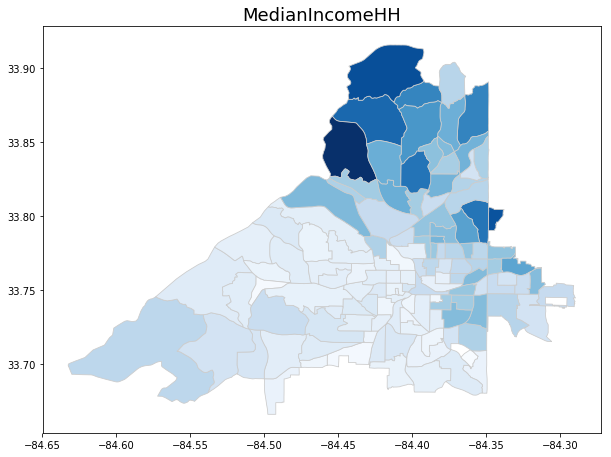

In [56]:
geotable = geopandas.read_file('../tractdata/tl_2018_13_tract.shp')
#geotable = geotable.astype('int64').dtypes
geotable[['GEOID']] = geotable[['GEOID']].astype('int64')

# geotable2 = atlantageocodes.merge(geotable, how='inner', on='GEOID')

geotable2 = geotable.set_index('GEOID').join(medianincomehh.set_index('GEOID'))

geotable2 = geotable2.dropna(axis=0, how='any')


geotable2['MedianIncomeHHpercent'] = geotable2['MedianIncomeHH']/geotable2['MedianIncomeHH'].max()

display(geotable2)
# set a variable that will call whatever column we want to visualise on the map
variable = 'MedianIncomeHH'
# set the range for the choropleth
vmin, vmax = 20000, 122000
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 10))

# create map
geotable2.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

plt.title("MedianIncomeHH", fontsize=18)